In [4]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import layers, Input, models, optimizers
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3

In [13]:
# Fc 레이어를 포함하지 않고, imagenet기반으로 학습된 가중치를 로드한 뒤 GAP 레이어를 추가
extractor = Sequential()
extractor.add(InceptionV3(include_top=False, 
                          weights='imagenet', 
                          input_shape=(150,150,3)))
extractor.add(layers.GlobalAveragePooling2D())

extractor_output_shape = extractor.get_output_shape_at(0)[1:]

model = Sequential()
model.add(layers.InputLayer(input_shape=extractor_output_shape))
model.add(layers.Dense(9, activation='relu'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 18441     
Total params: 18,441
Trainable params: 18,441
Non-trainable params: 0
_________________________________________________________________


In [28]:
import os
from keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (150, 150, 3)  

train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=10,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.7,
#                                    zoom_range=[0.9, 2.2],
#                                    horizontal_flip=True,
#                                    vertical_flip=True,
#                                    fill_mode='nearest',
                                   validation_split=0.33)
 
imageGenerator = ImageDataGenerator(rescale=1./255
#                                     ,rotation_range=20,
#                                     width_shift_range=0.1,
#                                     height_shift_range=0.1,
#                                     brightness_range=[.2, .2],
#                                     horizontal_flip=True
                                   )

trainGen = imageGenerator.flow_from_directory('C:/python_DA/img/pattern',
                                              target_size=IMG_SIZE[:2],
                                              batch_size=20)

testGen = ImageDataGenerator(rescale=1./255,).flow_from_directory('C:/python_DA/img/pattern',
                                                                  target_size=IMG_SIZE[:2],
                                                                  batch_size=20)


# training_set = train_datagen.flow_from_directory('C:/python_DA/img/pattern',
#                                                  target_size = (150,150),
#                                                  batch_size = 10,
#                                                  class_mode = 'categorical',
#                                                  subset="training"
#                                                 )
# validation_set = train_datagen.flow_from_directory('C:/python_DA/img/pattern',
#                                                  target_size = (150,150),
#                                                  batch_size = 10,
#                                                  class_mode = 'categorical',
#                                                  subset="validation"
#                                                   )

Found 7986 images belonging to 9 classes.
Found 7986 images belonging to 9 classes.


In [19]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy', 
    metrics=['acc'])

extractor.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy', 
    metrics=['acc'])


In [20]:
import numpy as np

def get_features(extractor, gen, cnt):
    bs = gen.batch_size
    ds = cnt
    extractor_shapes = list(extractor.get_output_shape_at(0)[1:])
    
    features = np.empty([0] + extractor_shapes)
    labels = np.empty((0, 9))
    
    for i, (trainX, trainY) in enumerate(gen):
        features = np.append(features, extractor.predict(trainX), axis=0)
        labels = np.append(labels, trainY, axis=0)
        print('batch index: {}/{}'.format(i * bs, ds), end='\r')
        
        if bs * i >= cnt:
            break
    print()
    return features, labels

In [29]:
trainX, trainY = get_features(extractor, trainGen, 3000)
testX, testY = get_features(extractor, testGen, 1000)

batch index: 3000/3000
batch index: 1000/1000


In [30]:
epochs = 100

history = model.fit(
    trainX, 
    trainY,
    epochs=epochs,
    batch_size=20,
    validation_split=.1,
)

Train on 2718 samples, validate on 302 samples
Epoch 1/100
2718/2718 [==============================] - 1s 462us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 2/100
2718/2718 [==============================] - 1s 410us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 3/100
2718/2718 [==============================] - 1s 423us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 4/100
2718/2718 [==============================] - 1s 404us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 5/100
2718/2718 [==============================] - 1s 361us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 6/100
2718/2718 [==============================] - 1s 391us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 7/100
2718/2718 [==============================] - 1s 365us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 8/100
2718/2718 [=============

Epoch 63/100
2718/2718 [==============================] - 1s 374us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 64/100
2718/2718 [==============================] - 1s 349us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 65/100
2718/2718 [==============================] - 1s 365us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 66/100
2718/2718 [==============================] - 1s 325us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 67/100
2718/2718 [==============================] - 1s 361us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 68/100
2718/2718 [==============================] - 1s 372us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 69/100
2718/2718 [==============================] - 1s 391us/step - loss: nan - acc: 0.0427 - val_loss: nan - val_acc: 0.0364
Epoch 70/100
2718/2718 [==============================] - 1s 395us/step - lo

## 결과 시각화

In [23]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

    plt.show()
    
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

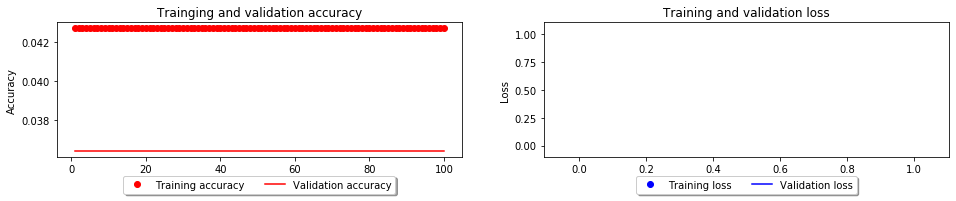

In [31]:
show_graph(history.history)

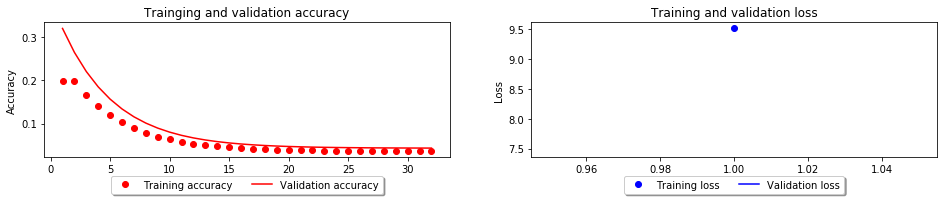

In [25]:
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val[:])
show_graph(smooth_data)


In [32]:
model.evaluate(testX, testY)

1020/1020 [==============================] - 0s 170us/step


[nan, 0.041176470632062236]